In [1]:
#!pip install scikit-bio

In [2]:
haplotypes = {}
with open("/home/nathan/Documents/Doutorado_diversidade_genética/Phylogeogra/AMOVA/nuc_files/exon2/cmyc_phased_exon2.nex", "r") as file:
    matrix_section = False
    for line in file:
        line = line.strip()
        if line.startswith("MATRIX"):
            matrix_section = True
            continue
        if line.startswith("END;"):
            matrix_section = False
        if matrix_section and line:
            parts = line.split()
            if len(parts) >= 2:
                haplotypes[parts[0]] = parts[1]

print(haplotypes)


{'[': '*', 'Hap_1': 'ATTGGTTGCCGCAAGGGG', 'Hap_2': 'GA.C..............', 'Hap_3': 'G..C...A...T......', 'Hap_4': 'G..C..............', 'Hap_5': 'G.................', 'Hap_6': '...C..............', 'Hap_7': '...C.....A.......A', 'Hap_8': '...C.....A........', 'Hap_9': 'G.G...............', 'Hap_10': 'GA................', 'Hap_11': '.....CA.A.AT......', 'Hap_12': '...C..C..T........', 'Hap_13': 'G..C.CA...........', 'Hap_14': '...CT.............', 'Hap_15': 'G....C............', 'Hap_16': 'G....C......TCA...', 'Hap_17': 'G..C...........A..', 'Hap_18': 'GA.T.............A', 'Hap_19': 'G...............A.'}


In [3]:
import numpy as np

def p_distance(seq1, seq2):
    """Calculate the p-distance between two sequences."""
    differences = sum(1 for a, b in zip(seq1, seq2) if a != b)
    return differences / len(seq1)

haplotype_names = list(haplotypes.keys())[1:]  # Exclude the first key '['
num_haplotypes = len(haplotype_names)
distance_matrix = np.zeros((num_haplotypes, num_haplotypes))

for i in range(num_haplotypes):
    for j in range(num_haplotypes):
        if i != j:
            seq1 = haplotypes[haplotype_names[i]]
            seq2 = haplotypes[haplotype_names[j]]
            distance_matrix[i, j] = p_distance(seq1, seq2)

print("Haplotype Names:", haplotype_names)
print("Distance Matrix:\n", distance_matrix)

Haplotype Names: ['Hap_1', 'Hap_2', 'Hap_3', 'Hap_4', 'Hap_5', 'Hap_6', 'Hap_7', 'Hap_8', 'Hap_9', 'Hap_10', 'Hap_11', 'Hap_12', 'Hap_13', 'Hap_14', 'Hap_15', 'Hap_16', 'Hap_17', 'Hap_18', 'Hap_19']
Distance Matrix:
 [[0.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.        ]
 [1.         0.         0.16666667 0.05555556 0.11111111 0.11111111
  0.22222222 0.16666667 0.16666667 0.05555556 0.44444444 0.22222222
  0.16666667 0.16666667 0.16666667 0.33333333 0.11111111 0.11111111
  0.16666667]
 [1.         0.16666667 0.         0.11111111 0.16666667 0.16666667
  0.27777778 0.22222222 0.22222222 0.22222222 0.38888889 0.27777778
  0.22222222 0.22222222 0.22222222 0.38888889 0.16666667 0.27777778
  0.22222222]
 [1.         0.05555556 0.11111111 0.         0.05555556 0.05555556
  0.16666667 0.11111111 0.11111111 0.11111111 0.38888889 0.16666667
  0.11111111 0.11

In [4]:
# Dicionário para mapear haplótipos aos seus grupos (Norte/Sul)
haplotype_groups = {
    'Hap_1': 'Norte', 'Hap_2': 'Norte', 'Hap_3': 'Norte', 'Hap_4': 'Norte', 'Hap_5': 'Norte',
    'Hap_6': 'Sul', 'Hap_7': 'Sul', 'Hap_8': 'Sul', 'Hap_9': 'Sul', 'Hap_10': 'Sul',
    'Hap_11': 'Norte', 'Hap_12': 'Norte', 'Hap_13': 'Norte', 'Hap_14': 'Norte', 'Hap_15': 'Norte',
    'Hap_16': 'Sul', 'Hap_17': 'Sul', 'Hap_18': 'Sul', 'Hap_19': 'Sul'
}

# Verificar a categorização dos haplótipos
for haplotype in haplotype_names:
    print(f"{haplotype}: {haplotype_groups[haplotype]}")

Hap_1: Norte
Hap_2: Norte
Hap_3: Norte
Hap_4: Norte
Hap_5: Norte
Hap_6: Sul
Hap_7: Sul
Hap_8: Sul
Hap_9: Sul
Hap_10: Sul
Hap_11: Norte
Hap_12: Norte
Hap_13: Norte
Hap_14: Norte
Hap_15: Norte
Hap_16: Sul
Hap_17: Sul
Hap_18: Sul
Hap_19: Sul


In [5]:
from scipy.spatial.distance import squareform
from skbio.stats.distance import DistanceMatrix
from skbio.stats.ordination import pcoa
from skbio.stats.distance import permanova


# Convert the distance matrix to a format suitable for scikit-bio
dm = DistanceMatrix(distance_matrix, haplotype_names)

# Perform AMOVA
results = permanova(dm, [haplotype_groups[hap] for hap in haplotype_names], permutations=999)

print("AMOVA results:")
print(results)

AMOVA results:
method name               PERMANOVA
test statistic name        pseudo-F
sample size                      19
number of groups                  2
test statistic             1.082307
p-value                       0.337
number of permutations          999
Name: PERMANOVA results, dtype: object


In [7]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from skbio.diversity import beta_diversity

# Pad sequences to make them all the same length
max_length = max(len(seq) for seq in haplotypes.values())
haplotype_matrix = np.array([list(seq.ljust(max_length, '-')) for seq in haplotypes.values()])

# Codificar haplótipos como matriz de presença/ausência
encoder = OneHotEncoder(sparse_output=False)
encoded_haplotypes = encoder.fit_transform(haplotype_matrix)

# Calcular a matriz de distâncias beta
beta_dm = beta_diversity("jaccard", encoded_haplotypes, ids=list(haplotypes.keys()))

#print("Beta Diversity Distance Matrix:")
print(beta_dm)



20x20 distance matrix
IDs:
'[', 'Hap_1', 'Hap_2', 'Hap_3', 'Hap_4', 'Hap_5', 'Hap_6', 'Hap_7', 'Hap_8', ...
Data:
[[0.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.        ]
 [1.         0.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.        ]
 [1.         1.         0.         0.28571429 0.10526316 0.2
  0.2        0.36363636 0.28571429 0.28571429 0.10526316 0.61538462
  0.36363636 0.28571429 0.28571429 0.28571429 0.5        0.2
  0.2        0.28571429]
 [1.         1.         0.28571429 0.         0.2        0.28571429
  0.28571429 0.43478261 0.36363636 0.36363636 0.36363636 0.56
  0.43478261 0.36363636 0.36363636 0.36363636 0.56       0.28571429
  0.43478261 0.36363636]
 [1.         1.         0.10526316 0.2

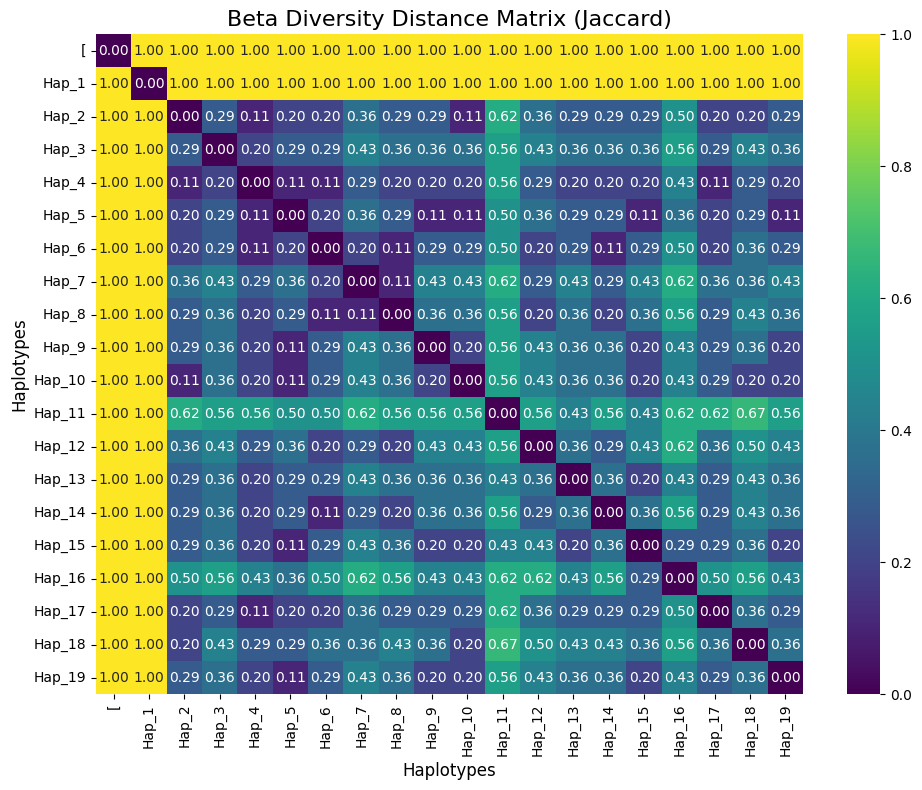

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotar matriz de distância beta
plt.figure(figsize=(10, 8))
sns.heatmap(beta_dm.data, 
            xticklabels=beta_dm.ids, 
            yticklabels=beta_dm.ids, 
            cmap="viridis", 
            annot=True, 
            fmt=".2f")
plt.title("Beta Diversity Distance Matrix (Jaccard)", fontsize=16)
plt.xlabel("Haplotypes", fontsize=12)
plt.ylabel("Haplotypes", fontsize=12)
plt.tight_layout()
plt.show()


/tmp/ipykernel_182010/4218658170.py:6: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(beta_dm.data, method="average")


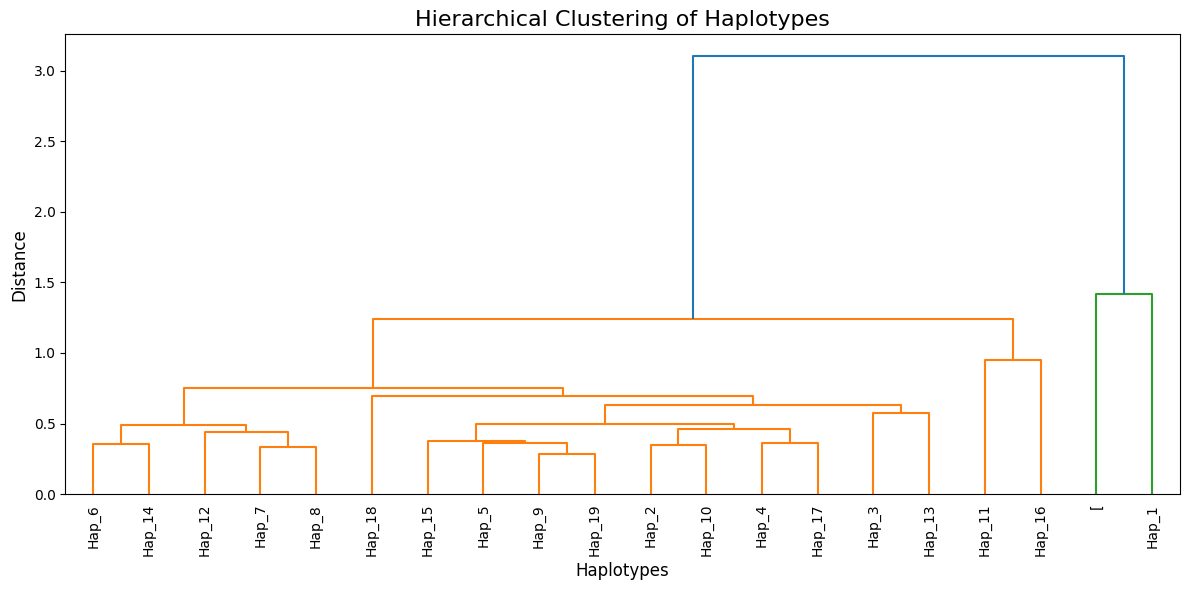

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage



# Criar linkage matrix para clustering
linkage_matrix = linkage(beta_dm.data, method="average")

# Plotar dendrograma
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=beta_dm.ids, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering of Haplotypes", fontsize=16)
plt.xlabel("Haplotypes", fontsize=12)
plt.ylabel("Distance", fontsize=12)
plt.tight_layout()
plt.show()


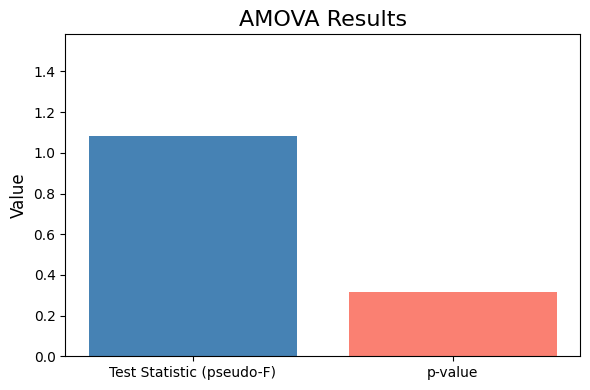

In [ ]:
# Visualizar o resultado da AMOVA
amova_results = {
    "Test Statistic (pseudo-F)": 1.082307,
    "p-value": 0.318
}

plt.figure(figsize=(6, 4))
plt.bar(amova_results.keys(), amova_results.values(), color=["steelblue", "salmon"])
plt.ylim(0, max(amova_results.values()) + 0.5)
plt.title("AMOVA Results", fontsize=16)
plt.ylabel("Value", fontsize=12)
plt.tight_layout()
plt.show()
